In [6]:

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [10]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [11]:

print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R²:", r2_score(y_test, y_pred_lasso))

Ridge MSE: 2891.998052108417
Ridge R²: 0.45414963757538074
Lasso MSE: 2884.609578988336
Lasso R²: 0.4555441754200451


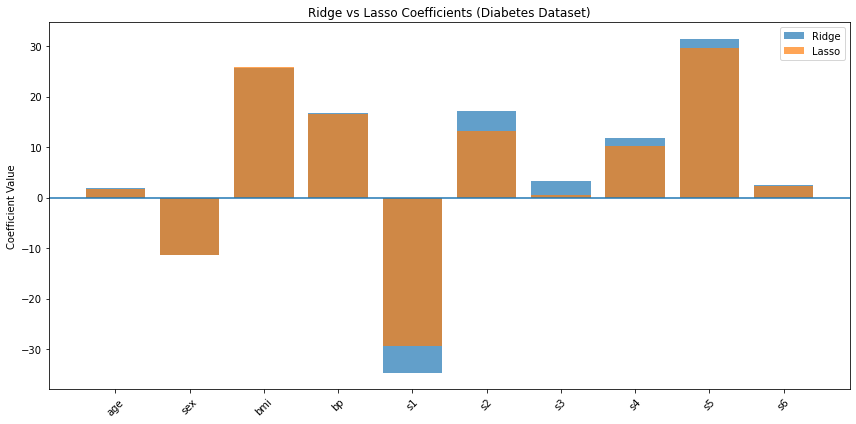

In [17]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso


diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_coef = ridge.coef_
lasso_coef = lasso.coef_

plt.figure(figsize=(12, 6))
plt.bar(feature_names, ridge_coef, alpha=0.7, label="Ridge")
plt.bar(feature_names, lasso_coef, alpha=0.7, label="Lasso")
plt.axhline(0)
plt.xticks(rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso Coefficients (Diabetes Dataset)")
plt.legend()
plt.tight_layout()
plt.show()
